In [21]:
import os
import shutil

import glob
import numpy as np

import tarfile

In [22]:
TARGET_PATH = "./data"

len(os.listdir(TARGET_PATH)) # 강아지 종류

120

In [23]:
# 파일 이름 변경
for dir_name in os.listdir(TARGET_PATH):
    breed_name = '_'.join(dir_name.split('-')[1:]).lower()

    source_dir = os.path.join(TARGET_PATH, dir_name)
    target_dir = os.path.join(TARGET_PATH, breed_name)
    
    shutil.move(source_dir, target_dir) # source_dir파일을 target_dir로 이름 변경

In [24]:
dataset = []

for filepath in glob.iglob(f'{TARGET_PATH}/**/*.jpg', recursive=True): # TARGET_PATH 기준 모든 하위 디렉토리에서 해당 확장자 파일을 검출하고 싶을 때
    breed_name = filepath.split('/')[2]
    dataset.append([filepath, breed_name])
dataset = np.array(dataset)

In [25]:
dataset

array([['./data/west_highland_white_terrier/n02098286_118.jpg',
        'west_highland_white_terrier'],
       ['./data/west_highland_white_terrier/n02098286_1982.jpg',
        'west_highland_white_terrier'],
       ['./data/west_highland_white_terrier/n02098286_1255.jpg',
        'west_highland_white_terrier'],
       ...,
       ['./data/brittany_spaniel/n02101388_10107.jpg',
        'brittany_spaniel'],
       ['./data/brittany_spaniel/n02101388_3365.jpg', 'brittany_spaniel'],
       ['./data/brittany_spaniel/n02101388_2970.jpg', 'brittany_spaniel']],
      dtype='<U57')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# stratify : 지정한 Data의 비율을 유지, 
# label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할
train_val_image, test_image, train_val_target, test_target = train_test_split(dataset[:,0], dataset[:,1], stratify=dataset[:,1], test_size=0.2)
train_image, val_image, train_target, val_target = train_test_split(train_val_image, train_val_target, stratify=train_val_target, test_size=0.2)

In [28]:
train_target.shape, val_target.shape, test_target.shape

((13171,), (3293,), (4116,))

In [29]:
import pandas as pd

In [30]:
pd.Series(val_target).value_counts() #/ len(train_target)

maltese_dog               41
afghan_hound              38
scottish_deerhound        37
bernese_mountain_dog      35
pomeranian                35
                          ..
eskimo_dog                24
curly_coated_retriever    24
dhole                     24
welsh_springer_spaniel    24
collie                    24
Length: 120, dtype: int64

train과 test 폴더를 나눠서 진행

In [31]:
DATA_PATH = './data'

if os.path.exists(DATA_PATH):
    # os.mkdir(DATA_PATH) # 단일 폴더만 생성 가능
    os.makedirs(os.path.join(DATA_PATH, 'train')) # 폴더를 여러개 만들기 가능
    os.makedirs(os.path.join(DATA_PATH, 'val'))
    os.makedirs(os.path.join(DATA_PATH, 'test'))

    for breed_name in set(test_target):
        os.makedirs(os.path.join(DATA_PATH, 'train', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'val', breed_name))
        os.makedirs(os.path.join(DATA_PATH, 'test', breed_name))

In [32]:
for filepath, target_dir in zip(train_image.tolist(), train_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'train', target_dir, filename)
    print(source_path, '---------',target_dir)
    shutil.move(source_path, target_dir) # shutil.copy(복사할 파일, 복사위치+파일명)


./data/boston_bull/n02096585_11808.jpg --------- ./data/train/boston_bull/n02096585_11808.jpg
./data/miniature_pinscher/n02107312_3624.jpg --------- ./data/train/miniature_pinscher/n02107312_3624.jpg
./data/german_shepherd/n02106662_5929.jpg --------- ./data/train/german_shepherd/n02106662_5929.jpg
./data/saluki/n02091831_5369.jpg --------- ./data/train/saluki/n02091831_5369.jpg
./data/staffordshire_bullterrier/n02093256_272.jpg --------- ./data/train/staffordshire_bullterrier/n02093256_272.jpg
./data/otterhound/n02091635_2068.jpg --------- ./data/train/otterhound/n02091635_2068.jpg
./data/borzoi/n02090622_7858.jpg --------- ./data/train/borzoi/n02090622_7858.jpg
./data/whippet/n02091134_14209.jpg --------- ./data/train/whippet/n02091134_14209.jpg
./data/border_collie/n02106166_6659.jpg --------- ./data/train/border_collie/n02106166_6659.jpg
./data/toy_terrier/n02087046_4409.jpg --------- ./data/train/toy_terrier/n02087046_4409.jpg
./data/standard_schnauzer/n02097209_4712.jpg ---------

In [33]:
for filepath, target_dir in zip(val_image.tolist(), val_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'val', target_dir, filename)
    print(source_path, target_dir)
    shutil.move(source_path, target_dir)

./data/dandie_dinmont/n02096437_929.jpg ./data/val/dandie_dinmont/n02096437_929.jpg
./data/lhasa/n02098413_9550.jpg ./data/val/lhasa/n02098413_9550.jpg
./data/irish_wolfhound/n02090721_309.jpg ./data/val/irish_wolfhound/n02090721_309.jpg
./data/saint_bernard/n02109525_9426.jpg ./data/val/saint_bernard/n02109525_9426.jpg
./data/maltese_dog/n02085936_17059.jpg ./data/val/maltese_dog/n02085936_17059.jpg
./data/japanese_spaniel/n02085782_4780.jpg ./data/val/japanese_spaniel/n02085782_4780.jpg
./data/papillon/n02086910_7766.jpg ./data/val/papillon/n02086910_7766.jpg
./data/cairn/n02096177_7877.jpg ./data/val/cairn/n02096177_7877.jpg
./data/giant_schnauzer/n02097130_2728.jpg ./data/val/giant_schnauzer/n02097130_2728.jpg
./data/chesapeake_bay_retriever/n02099849_1599.jpg ./data/val/chesapeake_bay_retriever/n02099849_1599.jpg
./data/brabancon_griffon/n02112706_442.jpg ./data/val/brabancon_griffon/n02112706_442.jpg
./data/bouvier_des_flandres/n02106382_2763.jpg ./data/val/bouvier_des_flandres/n

In [34]:
for filepath, target_dir in zip(test_image.tolist(), test_target.tolist()):
    filename = filepath.split('/')[-1]
    source_path = filepath
    target_dir = os.path.join(DATA_PATH, 'test', target_dir, filename)
    print(source_path, target_dir)
    shutil.move(source_path, target_dir)


./data/chesapeake_bay_retriever/n02099849_338.jpg ./data/test/chesapeake_bay_retriever/n02099849_338.jpg
./data/brittany_spaniel/n02101388_10509.jpg ./data/test/brittany_spaniel/n02101388_10509.jpg
./data/vizsla/n02100583_6040.jpg ./data/test/vizsla/n02100583_6040.jpg
./data/rhodesian_ridgeback/n02087394_613.jpg ./data/test/rhodesian_ridgeback/n02087394_613.jpg
./data/kuvasz/n02104029_4814.jpg ./data/test/kuvasz/n02104029_4814.jpg
./data/briard/n02105251_2406.jpg ./data/test/briard/n02105251_2406.jpg
./data/bluetick/n02088632_4414.jpg ./data/test/bluetick/n02088632_4414.jpg
./data/leonberg/n02111129_3180.jpg ./data/test/leonberg/n02111129_3180.jpg
./data/english_springer/n02102040_403.jpg ./data/test/english_springer/n02102040_403.jpg
./data/dingo/n02115641_7222.jpg ./data/test/dingo/n02115641_7222.jpg
./data/tibetan_mastiff/n02108551_5547.jpg ./data/test/tibetan_mastiff/n02108551_5547.jpg
./data/vizsla/n02100583_12676.jpg ./data/test/vizsla/n02100583_12676.jpg
./data/curly_coated_retr

In [37]:
for dir_name in os.listdir(DATA_PATH):
    if dir_name not in ['train', 'test', 'val']:
        shutil.rmtree(DATA_PATH+'/'+dir_name)

In [36]:
target_dir

'./data/test/bouvier_des_flandres/n02106382_2502.jpg'

---

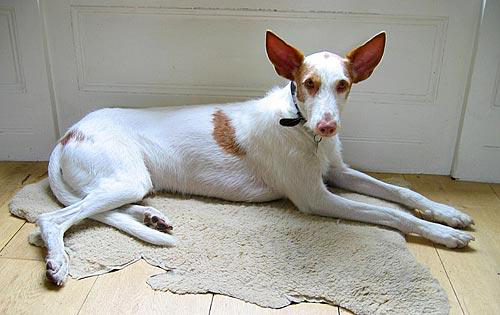

In [22]:
from PIL import Image # 이미지 다루기

im = Image.open(target_dir)
im

In [23]:
import matplotlib.image as mpimg

def process(filename: str = None) -> None:
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

idx = np.random.choice(len(dataset), 10)

images = dataset[:,0][idx]

for file in images:
    process(file)

print(dataset[:, 1][idx])

NameError: name 'plt' is not defined

### Data 변형(augmentation에 쓰임)

In [ ]:
from torchvision import datasets, transforms, models

In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                     ])


test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                     ])


DATASET_PATH = './data/dataset/'
train_data = datasets.ImageFolder(DATASET_PATH + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(DATASET_PATH + '/test', transform=test_transforms)

In [ ]:
import torch

train_loader = torch.utils.data.DataLoader(train_data, batch_size = 32, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 32, shuffle = True)

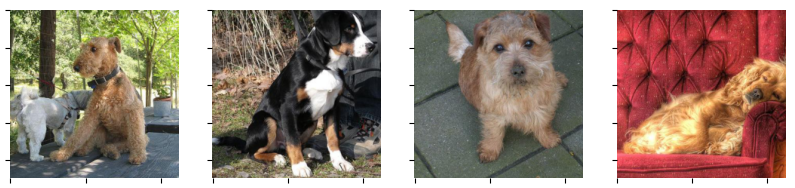

In [ ]:
data_iter = iter(test_loader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    imshow(images[i], ax= ax, normalize=True)
